<a href="https://colab.research.google.com/github/Josh-Rogers-Sr/Student-KPI-Analytics-Project/blob/main/Student_KPI_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [12]:
df = pd.read_csv('student_kpi_dataset.csv')

print("                   HEADER                    ")
print(" ")
print(df.head())
print("                   SHAPE                   ")
print(" ")
print(df.shape)
print("                   INFO                    ")
print(" ")
print(df.info())
print(" ")
categorical_vars = ['year', 'department', 'is_at_risk']
continuous_vars = ['gpa', 'attendance_rate', 'advising_sessions_attended']

                   HEADER                    
 
   student_id  department      year   gpa  attendance_rate  \
0           1   Education    Senior  4.00             77.4   
1           2     Biology    Senior  2.98             76.2   
2           3  Psychology    Senior  2.99             71.7   
3           4     Biology  Freshman  3.10             77.3   
4           5     Biology    Senior  3.30             80.1   

   advising_sessions_attended  is_at_risk  
0                           0           0  
1                           1           0  
2                           2           0  
3                           1           0  
4                           6           0  
                   SHAPE                   
 
(200, 7)
                   INFO                    
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  ----

In [13]:
# Create a new object that omits null rows
df_filtered = df.dropna()

summary_stats = df_filtered.describe()[['gpa', 'attendance_rate', 'advising_sessions_attended']]
print("                   CONTINUOUS VARIABLE SUMMARY STATISTICS                    ")
print(" ")
print(summary_stats)
print(" ")
print(df_filtered.shape)

                   CONTINUOUS VARIABLE SUMMARY STATISTICS                    
 
              gpa  attendance_rate  advising_sessions_attended
count  200.000000       200.000000                  200.000000
mean     2.972350        85.595500                    2.070000
std      0.491034        10.074453                    1.508802
min      1.720000        50.200000                    0.000000
25%      2.655000        78.950000                    1.000000
50%      2.945000        86.900000                    2.000000
75%      3.270000        92.625000                    3.000000
max      4.000000       100.000000                    8.000000
 
(200, 7)


In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df_filtered[['gpa', 'attendance_rate', 'advising_sessions_attended']].quantile(0.25)
Q3 = df_filtered[['gpa', 'attendance_rate', 'advising_sessions_attended']].quantile(0.75)

# Calculate the IQR for each numerical column
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each numerical column
outliers = ((df_filtered[['gpa', 'attendance_rate', 'advising_sessions_attended']] < lower_bound) | (df_filtered[['gpa', 'attendance_rate', 'advising_sessions_attended']] > upper_bound))

# Count the number of outliers for each column
outlier_counts = outliers.sum()
print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
gpa                           1
attendance_rate               1
advising_sessions_attended    1
dtype: int64


In [5]:
df_filtered = df_filtered[~outliers.any(axis=1)]

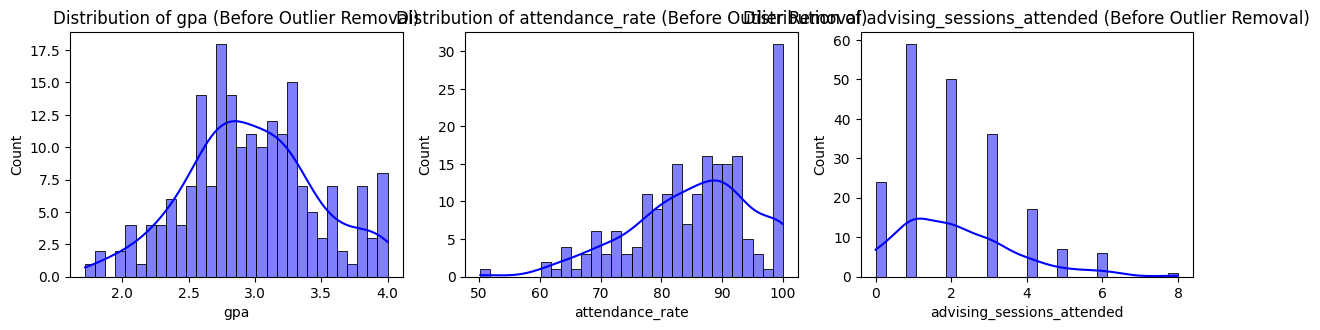

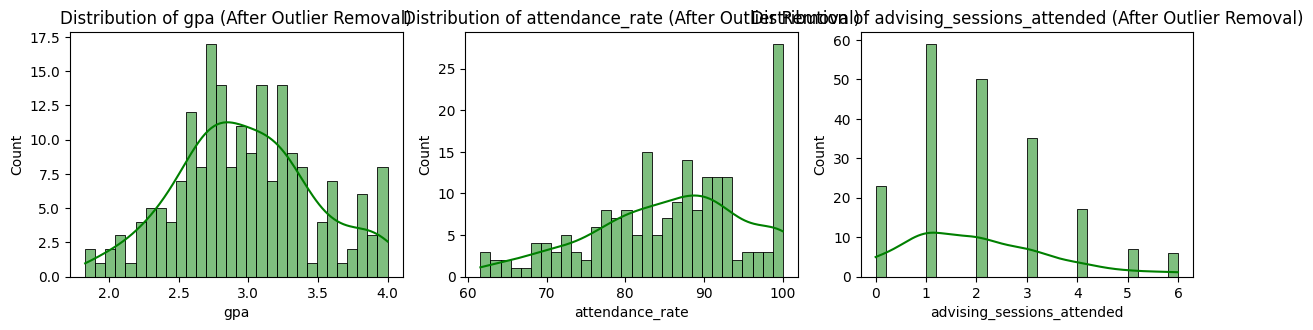

In [6]:
# Plotting distribution of key variables before outlier removal
plt.figure(figsize=(12, 6))

# Plot histograms for 'year', 'odometer', and 'Price_Diff' before removing outliers
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col} (Before Outlier Removal)')

plt.tight_layout()
plt.show()

# Plotting distribution of key variables after outlier removal
plt.figure(figsize=(12, 6))

# Plot histograms for 'year', 'odometer', and 'Price_Diff' after removing outliers
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_filtered[col], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {col} (After Outlier Removal)')

plt.tight_layout()
plt.show()

In [7]:
# Apply one-hot encoding to categorical variables (make, color, etc.)
df_ohe = pd.get_dummies(df_filtered[categorical_vars], drop_first=False, dtype=int)

# Concatenate numerical columns
df_ohe = pd.concat([df_ohe, df_filtered[['gpa', 'attendance_rate', 'advising_sessions_attended']]], axis=1)

# Check the resulting dataframe
print(df_ohe.head())
print(df_ohe.columns.tolist())

   is_at_risk  year_Freshman  year_Junior  year_Senior  year_Sophomore  \
0           0              0            0            1               0   
1           0              0            0            1               0   
2           0              0            0            1               0   
3           0              1            0            0               0   
4           0              0            0            1               0   

   department_Biology  department_Business  department_Computer Science  \
0                   0                    0                            0   
1                   1                    0                            0   
2                   0                    0                            0   
3                   1                    0                            0   
4                   1                    0                            0   

   department_Education  department_Engineering  department_Psychology   gpa  \
0                     1 

In [10]:
# Export filtered data (good for SQL)
df_filtered.to_csv("clean_student_kpi.csv", index=False)

# Optional: Export one-hot encoded version (for machine learning only)
df_ohe.to_csv("student_kpi_ohe.csv", index=False)

In [17]:
at_risk = pd.read_csv('temp.percent_at_risk.csv')
avg_gpa = pd.read_csv('temp.avg_department_gpa.csv')
advising = pd.read_csv('temp.advising_sessions_attended.csv')


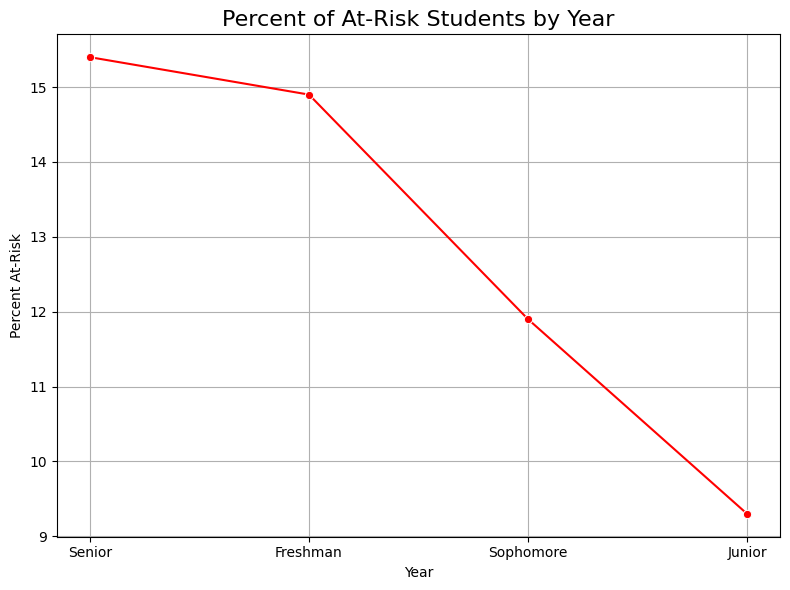

In [19]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=at_risk, x='year', y='percent_at_risk', marker='o', color='red')
plt.title('Percent of At-Risk Students by Year', fontsize=16)
plt.ylabel('Percent At-Risk')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-3709538028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=advising, x='advising_sessions_attended', y='percent_at_risk', palette='coolwarm')


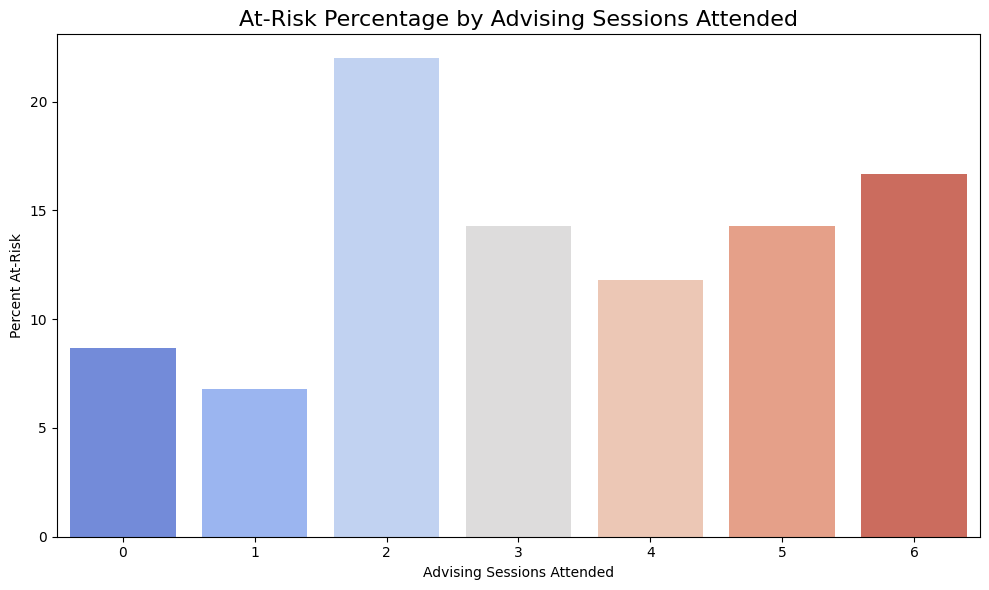

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=advising, x='advising_sessions_attended', y='percent_at_risk', palette='coolwarm')
plt.title('At-Risk Percentage by Advising Sessions Attended', fontsize=16)
plt.xlabel('Advising Sessions Attended')
plt.ylabel('Percent At-Risk')
plt.tight_layout()
plt.show()

In [21]:
import plotly.express as px

fig = px.bar(avg_gpa, x='department', y='avg_gpa', title='Avg GPA by Department (Interactive)',
             color='avg_gpa', color_continuous_scale='Viridis')
fig.show()